# Project: Analysis of Spotify Streaming Charts

## Introduction

In today's digital music landscape, streaming platforms like Spotify play a pivotal role in shaping listening habits and determining global music trends. Every day, millions of users stream tracks from a wide variety of artists and genres, generating rich datasets that reflect real-time popularity, regional preferences, and evolving audience tastes.

This project focuses on an in-depth analysis of Spotify's streaming charts data. The primary objective is to explore and visualize patterns in track and artist popularity across different regions and over time. By performing data cleaning, aggregation, and various descriptive analyses, I aim to answer questions such as:

- Which tracks and artists are the most popular overall?
- How does track popularity vary across different regions (e.g., Global, US, other countries)?
- What are the temporal trends in streaming numbers for specific top tracks?
- Can I identify any noticeable spikes or seasonal trends in listening behavior?

To achieve these goals, I will perform the following steps:

1. **Data loading and inspection:** Begin by importing the dataset, checking for missing values, and understanding its structure.
2. **Exploratory data analysis (EDA):** Compute basic statistics such as the number of unique tracks and artists, and summarize overall streaming activity.
3. **Ranking tracks and artists:** Identify and visualize the most-streamed tracks and artists to highlight leading contributors to Spotify's charts.
4. **Regional analysis:** Analyze track performance specifically in the Global region and demonstrate how popularity may vary geographically.
5. **Temporal analysis:** Explore streaming trends over time for selected tracks, enabling us to detect fluctuations in listener interest.

This analysis provides valuable insights for artists, record labels, marketers, and music enthusiasts interested in understanding what drives global and regional music success. Furthermore, the visualizations and findings may support business decisions, playlist curation, and marketing strategies in the music industry.

I invite you to explore the code, plots, and insights presented here, and I welcome contributions or extensions such as genre-based analysis, sentiment analysis on lyrics, or predictive modeling for future track performance.

---


## Libraries

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re


## Dataset Description and Collection

#### Dataset Source
This project uses two publicly available data from kworb.net's Spotify chart tracking:

- Canada Daily Chart Totals

- Global Daily Chart Totals

These datasets provide cumulative performance statistics for songs that appeared on Spotify’s Daily Top 200 charts (Global and Canada) from August 17, 2014 to April 7, 2025. Each row contains:

 - Artist and Title – the combined name of the artist and the song

- Days – total number of days the track has appeared on the daily Top 200 chart

- Top 10 – number of times the track ranked within the Top 10 positions

- Peak – the best chart position the track has ever reached (e.g., 1 = peaked at #1)

- Total Streams – cumulative total streams while the song was on the chart

- Region – the chart region the data is from (e.g., Canada or Global)

---

#### What the Dataset Represents

Each dataset represents the historical performance of songs on Spotify’s Top 200 daily charts, capturing both popularity over time and success by tracking how long and how often songs stayed in the Top 10.


In [ ]:
# URL for Global Daily Chart Totals
url1 = "https://kworb.net/spotify/country/global_daily_totals.html"

# URL for Canada Daily Chart Totals
url2 = "https://kworb.net/spotify/country/ca_daily_totals.html"

def scrape_kworb_chart(url, region_name):
    # Request the page
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', class_='addpos sortable')
    rows = table.find_all('tr')

    data = []
    for row in rows[1:]:  # Skip header
        cols = row.find_all('td')
        if len(cols) < 6:
            continue
        artist_title = cols[0].text.strip()
        days = cols[1].text.strip()
        top10 = cols[2].text.strip()
        peak_raw = cols[3].text.strip()
        peak = re.search(r'^\d+', peak_raw).group() if re.search(r'^\d+', peak_raw) else None
        total_streams = cols[5].text.strip()

        #Test for if data was scraped accurately
        #test_scrape = artist_title + "|" + days+ "|" + peak_raw+ "|" + total_streams
        #print(test_scrape)


        data.append([
            artist_title, days, top10, peak, total_streams, region_name
        ])

    # Create DataFrame
    df = pd.DataFrame(data, columns=[
    'Artist and Title', 'Days', 'Top 10', 'Peak', 'Total Streams', 'Region'
    ])

    return df


df_canada = scrape_kworb_chart(url1, 'Canada')
df_global = scrape_kworb_chart(url2, 'Global')

In [2]:
print("Spotify Canadian Daily Charts Data Collected: \n")
print(df_canada.info())
print("\n")
print(df_canada.head())
print("\n")

print("------------------------------------------------------------------")

print("\n Spotify Global Daily Charts Data Collected: \n")
print(df_global.info())
print("\n")
print(df_global.head())
print("\n")


Spotify Canadian Daily Charts Data Collected: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11006 entries, 0 to 11005
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  11006 non-null  object
 1   Days              11006 non-null  object
 2   Top 10            11006 non-null  object
 3   Peak              11006 non-null  object
 4   Total Streams     11006 non-null  object
 5   Region            11006 non-null  object
dtypes: object(6)
memory usage: 516.0+ KB
None


                                    Artist and Title  Days Top 10 Peak  \
0                       The Weeknd - Blinding Lights  1953    446    1   
1                           Harry Styles - As It Was  1094    426    1   
2                          Ed Sheeran - Shape of You  2473    237    1   
3                  Lewis Capaldi - Someone You Loved  2219    107    4   
4  Post Malone - Sunflower - Spider-Man: Into the...  219

# Data Cleaning and Preparation

The raw data scraped from the HTML tables on kworb.net includes the artist and title (combined), total days on the chart, number of Top 10 appearances, peak chart position, peak day stream count, and total streams accumulated. To prepare the data for analysis, I:

- Converted the raw HTML rows into a unified and structured pandas DataFrame

- Cleaned and converted string fields (e.g., Artist and Title) into appropriate string types

- Cleaned and converted numerical fields (e.g., Days, Top 10, Peak, Streams) into appropriate numeric types

- Separated the Artist and Title into distinct columns for more flexible analysis

- Handled missing values by replacing all NA/null data with a value




In [3]:
def clean_df(df):

    # Ensure all object fields are treated as strings
    df['Artist and Title'] = df['Artist and Title'].astype(str)
    df['Total Streams'] = df['Total Streams'].astype(str)
    df['Region'] = df['Region'].astype(str)


    # Convert numeric fields from object to appropriate numeric types
    df['Days'] = pd.to_numeric(df['Days'], errors='coerce')
    df['Top 10'] = pd.to_numeric(df['Top 10'], errors='coerce')
    df['Peak'] = pd.to_numeric(df['Peak'], errors='coerce')
    df['Total Streams'] = df['Total Streams'].str.replace(',', '', regex=True).astype(float)

    # Split "Artist and Title" into two new columns
    df[['Artist', 'Title']] = df['Artist and Title'].str.extract(r'^(.*?)\s[–—-]\s(.*)$')
    df['Artist'] = df['Artist'].astype(str)
    df['Title'] = df['Title'].astype(str)

    # Select and reorder columns
    df = df[['Region', 'Artist', 'Title', 'Days', 'Top 10', 'Peak',  'Total Streams']]

    return df


# Clean both datasets
df_canada_clean = clean_df(df_canada)
df_global_clean = clean_df(df_global)

#Combining datasets
df_combined_clean = pd.concat([df_canada_clean, df_global_clean], ignore_index=True)

#Handling Missing Values
if(df_combined_clean.isnull().values.any()):
    df_combined_clean = df_combined_clean.fillna(0)

#Remove duplicates
df_combined_clean = df_combined_clean.drop_duplicates()


In [5]:
print("Spotify Daily Charts Clean Combined Data: \n")
print(df_combined_clean.info())
print("\n")
print(df_combined_clean.head())
print("\n")

Spotify Daily Charts Clean Combined Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23081 entries, 0 to 23080
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         23081 non-null  object 
 1   Artist         23081 non-null  object 
 2   Title          23081 non-null  object 
 3   Days           23081 non-null  int64  
 4   Top 10         23081 non-null  float64
 5   Peak           23081 non-null  int64  
 6   Total Streams  23081 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.2+ MB
None


   Region         Artist                                          Title  Days  \
0  Canada     The Weeknd                                Blinding Lights  1953   
1  Canada   Harry Styles                                      As It Was  1094   
2  Canada     Ed Sheeran                                   Shape of You  2473   
3  Canada  Lewis Capaldi                              Someo

## Data Analysis Using Pandas, Matplotlib, & SciPy

(3 libraries used in Class)

To analyze the global and Canadian Spotify streaming data in this section, I used 3 Python data science libraries:

- pandas – for data manipulation, aggregation, and summaries

- SciPy – to apply clustering techniques (specifically K-Means) for identifying groups of similar tracks based on chart performance and stream counts

- matplotlib - for visualization of the relationship between Peak Position and Total Streams and the k-mean clusters



### Insight 1: Most Streamed Artists Globally and in Canada

Using pandas, I aggregated the maximum streams by artist to identify the top 5 artists in Canada and Globally.




In [6]:
top_artists_canada = df_canada_clean.groupby('Artist')['Total Streams'].max().sort_values(ascending=False).head(5)
top_artists_global = df_global_clean.groupby('Artist')['Total Streams'].max().sort_values(ascending=False).head(5)

print("Top Artists in Canada:\n", top_artists_canada)
print("\nTop Artists Globally:\n", top_artists_global)


Top Artists in Canada:
 Artist
Taylor Swift    25204472.0
Mariah Carey    24863570.0
Wham!           24556791.0
Brenda Lee      21635497.0
Adele           19749704.0
Name: Total Streams, dtype: float64

Top Artists Globally:
 Artist
Post Malone     1518897.0
Taylor Swift    1287862.0
Brenda Lee      1197041.0
Bobby Helms     1036466.0
Mariah Carey    1012018.0
Name: Total Streams, dtype: float64


#### Observations
The results show distinct differences in top-streamed artists between Canada and the Global charts:

- In Canada, holiday songs dominate the top spots, with artists like Taylor Swift, Mariah Carey, and Brenda Lee displaying very high stream counts. This suggests a strong seasonal influence on charts in Canada

- Globally, Post Malone leads, followed closely by Taylor Swift and Brenda Lee, indicating some overlap with Canada but with a larger variety that includes pop and hip-hop artists like Bobby Helms and Mariah Carey.

- Interestingly, artists like Wham! and Adele rank high in Canada but don’t appear in the global top 5, displaying specific preferences.

### Insight 2: Relationship Between Peak Position and Total Streams

I visualized the correlation between a song’s Peak Chart Position and its Total Streams using a scatter plot. This highlights whether reaching #1 correlates with high overall popularity.

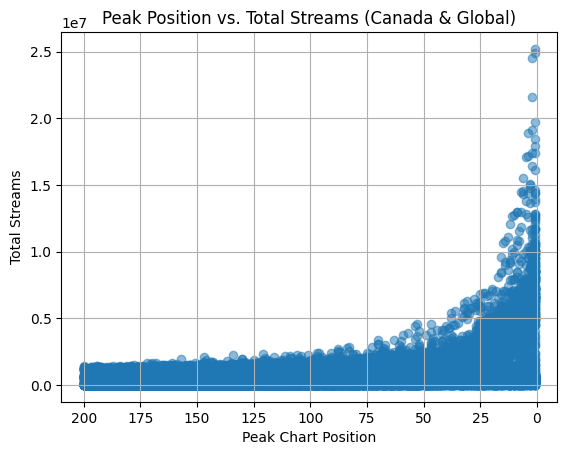

<Figure size 800x500 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df_combined_clean['Peak'], df_combined_clean['Total Streams'], alpha=0.5)
plt.xlabel('Peak Chart Position')
plt.ylabel('Total Streams')
plt.title('Peak Position vs. Total Streams (Canada & Global)')
plt.gca().invert_xaxis()  # lower peak number means better chart position
plt.grid(True)
plt.figure(figsize=(8, 5))
plt.show()


#### Observations

The scatter plot reveals a clear inverse relationship between a song's Peak Chart Position and its Total Streams:

- Songs that peaked at #1 to #10 generally have higher total streams, as expected.

- However, there's a long tail of songs that didn’t peak in the Top 10 but still had a high number of total streams which suggests that some songs gain popularity over time without placing high in the Daily Charts initially.

- The curve flattens out as peak position increases, but there is still some upward variability, which suggests there are some long-term or viral hits.



### Insight 3: K-Means Clustering of Songs by Popularity

To group songs by popularity patterns, I applied K-Means clustering using the scipy.cluster.vq module.

I used the whiten() function to normalize Days, Top 10, and Total Streams, then applied kmeans() to identify three distinct clusters.

These clusters reveal distinct song types: long-term hits, short-term hits, and moderate hits.

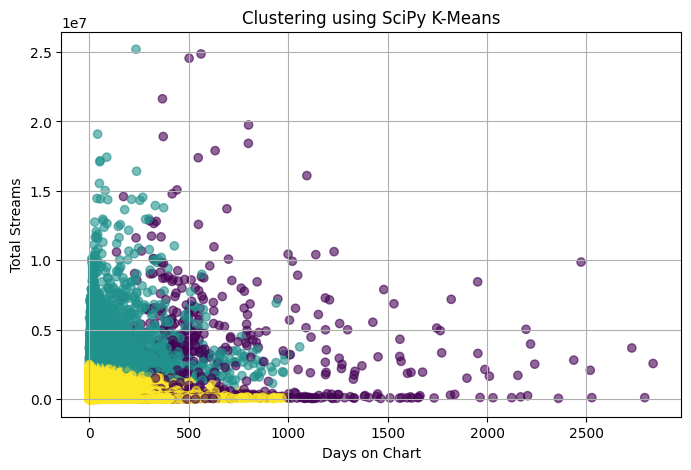

In [8]:
from scipy.cluster.vq import kmeans, vq, whiten
import numpy as np

features = df_combined_clean[['Days', 'Top 10', 'Total Streams']].dropna()

# Whiten means to normalize the data (needed to scale the features by their std deviation)
whitened = whiten(features)

# Perform k-means clustering for 3 clusters
centroids, distortion = kmeans(whitened, 3)

# Assign each observation to a cluster
cluster_labels, _ = vq(whitened, centroids)

plt.figure(figsize=(8,5))
plt.scatter(features['Days'], features['Total Streams'],
            c=cluster_labels, cmap='viridis', alpha=0.6)
plt.xlabel('Days on Chart')
plt.ylabel('Total Streams')
plt.title('Clustering using SciPy K-Means')
plt.grid(True)
plt.show()



#### Observations
The K-Means clustering reveals three clear song clusters based on Days on Chart, Top 10, and Total Streams:

- Cluster 1 (yellow) contains songs with low streams and low chart ranking, likely indicating short-term or one-time appearances.

- Cluster 2 (teal) features songs with moderate to high streams, but a wide spread in distribution in the Days on the Chart , possibly indicating steady performance or Canadian-specific hits.

- Cluster 3 (purple) includes long-term, and high-performing tracks that have consistently on the Daily Charts for years. These are the long-term hits.

The distribution confirms that not all hits are the same, some songs rise in popularity quickly and fade, while others gain popularity slowly or dominate the charts for long periods.



## Data Analysis with Seaborn & Altair

To deepen the analysis, I incorporated 2 new Python libraries not covered in class, Seaborn and Altair:

 -  Seaborn was used to produce a correlation heatmap revealing key correlations between Daily Chart metrics.

 - Altair was used to create a clean and interactive bar chart ranking artists by their total chart presence







### Insight 4: Correlation Between Daily Chart Metrics

Using Seaborn, I generated a correlation matrix across four key quantitative features: Days, Top 10 appearances, Peak position, and Total Streams.

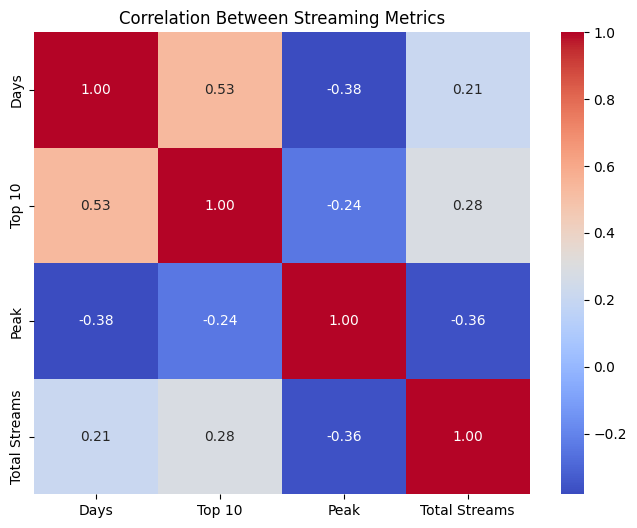

In [9]:
#!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
corr = df_combined_clean[['Days', 'Top 10', 'Peak', 'Total Streams']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Streaming Metrics')
plt.show()



#### Observations
- There is a strong positive correlation between Days and Top 10 (0.53), suggesting that songs which spend longer on the chart also appear in the Top 10 more often.

- Peak (where lower is better) is negatively correlated with both Days and Total Streams (–0.38 and –0.36), meaning songs that peak at higher positions (closer to #1) tend to stay longer and have more plays.

- Top 10 and Total Streams also show moderate positive correlation (0.28), suggesting that hit songs create larger streaming volumes.

### Insight 5: Scatter Matrix of Daily Chart Features

Using Altair, I aggregated the dataset by artist and visualized the Top 10 artists with the highest cumulative number of days on the Spotify Top 200 chart.

In [11]:
import altair as alt

top_artists = df_combined_clean.groupby('Artist')['Days'].sum().nlargest(10).reset_index()

chart2 = alt.Chart(top_artists).mark_bar().encode(
    x=alt.X('Days:Q', title='Days On Chart'),
    y=alt.Y('Artist:N', sort='-x'),
    tooltip=['Artist', 'Days']
).properties(
    title='Top 10 Artists by Days on Chart',
    width=600,
    height=400
)

chart2




alt.Chart(...)

#### Observations
- Drake leads the chart by a significant amount, followed by The Weeknd, Ed Sheeran, and Post Malone.

- These artists have consistently been placed on the Daily Charts, staying on longer than others across both Canadian and global rankings.

- Pop and hip-hop dominate the list, suggesting these genres have broader and more sustained appeal.

## Data Analysis with Plotly

### Insight 6: Interactive Visualization of Top 100 Songs

To create a more engaging exploration of song performance, I used Plotly Express to build an interactive bubble chart combining multiple features:

In [13]:
import plotly.express as px

fig = px.scatter(
    df_combined_clean,
    x='Days',
    y='Total Streams',
    size='Top 10',
    color='Region',
    hover_name='Title',
    hover_data={'Artist': True, 'Peak': True, 'Days': True, 'Total Streams': True},
    title='Interactive Bubble Chart: Streams vs. Days with Top 10 Size',
    size_max=60,
    height=600
)

fig.update_layout(
    xaxis_title="Days on Chart",
    yaxis_title="Total Streams",
    legend_title="Region",
    template='plotly_dark'
)

fig.show()



#### Observations

1. Strong Positive Trend for Canadian Songs:

- The blue bubbles (Canada) generally increase in Total Streams as Days on Chart increases.

- This implies that in Canada, chart longevity has a strong association with overall streaming success.

- The largest Canadian bubbles are concentrated between 500–2000 days, with streams reaching up to 25M+.

2. Low Streaming Counts for Global Songs:

- Surprisingly, the red bubbles (Global) appear lower on the chart, with significantly lower total stream counts across all durations.

- This may reflect how global entries in the dataset are skewed toward lower-performing or short-term songs

3. Top 10 Frequency Impacts Size
- Some large bubbles occur early on the chart (under 500 days), meaning they entered the Top 10 frequently in a short period.

- This suggests that they are viral hits which are songs that shot up quickly, gained lots of popularity, and then fell off.



## Conclusion
Through this project, I conducted a detailed analysis of Spotify's Global and Canadian daily streaming charts using data scraped directly from kworb.net.

By cleaning and structuring over 23,000 song entries, I was able to explore regional music trends, days on chart , and streaming behavior using a range of tools including pandas, SciPy, seaborn, altair, and plotly.

Key findings include:

- Artist Popularity: Canadian listeners gravitate toward seasonal and long-term favorites like Taylor Swift, Mariah Carey, and Wham!, while global listeners showed more diversity, favoring artists like Post Malone and Bobby Helms.

- Chart Position & Success: Songs that peaked at higher chart positions (closer to #1) tended to get more total streams, but several tracks with lower peaks still achieved long-term success which highlights the power of steady, viral, or playlist growth.

- Clustering Patterns: Using SciPy’s K-means clustering, I identified three distinct song profiles: short-lived hits, moderate performers, and long-term chart-toppers.

- Metric Correlations: A heatmap showed a strong relationship between Days on Chart and Top 10 appearances, while lower peak positions correlated negatively with stream counts. This confirmed that chart toppers tend to dominate in overall streams.

- Interactive Insights: A Plotly bubble chart provided an dynamic view of how longevity (Days), success (Total Streams), and Top 10 frequency differ between Canadian and Global songs.

This analysis demonstrates how combining web scraping, data wrangling, and visualization libraries can uncover actionable insights about music popularity and regional preferences.
